# What sells a car?

We're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on our site every day. We need to study data collected over the last few years and determine which factors influence the price of a vehicle.

The goal of this project is to analyse a set of advertisments for selling vehicles that was uploaded from our site. We will need to investigate the key parameters to determine the ones that affect the prices of a vehicle the most

## Initialization

In [1]:
# Loading all the libraries
import pandas as pd
import seaborn as sns
import numpy as np
import datetime
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

### Load data

In [2]:
# Load the data file into a DataFrame
try:
    data = pd.read_csv('C:\\Users\\R\\Downloads\\vehicles_us.csv')
except:
    data = pd.read_csv('/datasets/vehicles_us.csv')
data.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


### Explore initial data

The dataset contains the following fields:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — the vehicle's mileage when the ad was published
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal



In [3]:
# print the general/summary information about the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          25572 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
# checking main statisticks
data.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [5]:
# print a sample of data
data.sample()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
23224,13495,2011.0,ford f-150,excellent,6.0,gas,163181.0,automatic,pickup,black,1.0,2019-04-05,52


The `info()` method gives us a good overview on the amount of observations and the missing amount of them. Overall, our dataset consists of **51525** observations with **13** different charachteristics on each. There are missing values in the `model year`, `cylinders`, `odometer`, `paint color` and `is 4wd` columns. The information in the `is 4wd` column probably adresses the question - is the car four-wheels drive, and since there can be only 2 states in this column and there is only one we will assume that the missing values of this column are the second expected value, i.e zeros. The `date posted` columns is saved as an object data type, although it is expected to be in the datetime format. `Model year`, `cylinders` and `odometer` are in the float format, but maybe it would much better to store them as integers for better calculations. `is_4wd`: logic tells us that the expected data type supposed to be of a boolean type.

The `describe()` method has showed us several things: there is quite a big gap in the **75%** and **max** values of the prices, there is a car as old as **114** years and also a very big gap in the odometer **75%** percentile and maximum value. Minimum values of price, days listed and odometer seem abnormaly low, but that can be explained for example, it could be a mistake for price and odometer, as for the days listed it could mean, that the advertisment was posted on the day the dataset was uploaded.

The next steps will be: to fill our missing values focusing on the dependant columns without missing values, and fixing the data types according to plan.

The values in the date posted are not of the expected format, so we will fix them using the datetime

In [6]:
data.date_posted.dtype 

dtype('O')

The values in the columns `model year`, `cylinders` and `odometer` have no need to be in the float format, so we can turn them to integers

In [7]:
print(data.cylinders.dtype)
print(data.odometer.dtype)
print(data.model_year.dtype)

float64
float64
float64


The float format fot this column seem really not in place, so we will turn them into Boolean type, right after filling in missing values

In [8]:
data.is_4wd.dtype 

dtype('float64')

Lets focus on the missing values first

In [9]:
data.isnull().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

Lets iterate through all columns and have a closer look at the missing values and their share in all data

In [10]:
for row in data:
    if data[row].isnull().sum() > 0:
        percent = data[row].isnull().sum() / len(data)
        print(row, '{:.2%}'.format(percent))

model_year 7.02%
cylinders 10.21%
odometer 15.32%
paint_color 17.99%
is_4wd 50.37%


### Conclusions and further steps

We saw **unsuitable formats** in the `model year`, `odometer`, `cylinders` and `date posted` columns; we will need to fix them to appropriate formats in order to make further calculations possible, because we will need this data to calculate the age of the car, average mileage and add two columns with month and year of the date when the advertisement was posted. 

In our **missing values** half of the data in `is_4wd` is absent, presumingly it is because it should be 1 and 0 and 0 somehow became NAN. We can easily restore missing values in `model year`, `cylinders` and `odometer` according to median values, and as we can not restore the color we will replace it with 'unknown' for conveniency.

### Check duplicates

In [11]:
data.duplicated().sum()

0

No duplicates to be seen

## Treat missing values

In [12]:
# Based on median of our model year by model lets restore data in the model_year column
data.model_year.describe()

count    47906.000000
mean      2009.750470
std          6.282065
min       1908.000000
25%       2006.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: model_year, dtype: float64

In [13]:
data['model_year'] = data.groupby('model')['model_year'].transform(lambda x: x.fillna(x.median()))
data['model_year'].isnull().sum()

0

In [14]:
# In a similar way we can restore the missing values in cylinders
data['cylinders'].value_counts()

8.0     15844
6.0     15700
4.0     13864
10.0      549
5.0       272
3.0        34
12.0        2
Name: cylinders, dtype: int64

In [15]:
data['cylinders'] = data.groupby(['model', 'model_year'])['cylinders'].transform(lambda x: x.fillna((x.median())))
data['cylinders'].value_counts()

8.0     17626
6.0     17460
4.0     15470
10.0      564
5.0       322
3.0        34
7.0        17
12.0        2
9.0         2
5.5         1
4.5         1
Name: cylinders, dtype: int64

As we see this method returns us values such as 4.5 and 5.5 which make no sense for quantity of cylinders, so lets try to round those values using the int() function inside a loop.

In [16]:
for row in data:
    try:
        data['cylinders'] = data['cylinders'].astype(int)
    except:
        data['cylinders'] = data.groupby('model')['cylinders'].fillna(method='ffill')
        data['cylinders'] = data['cylinders'].astype(int)

In [17]:
data['cylinders'].value_counts()

8     17638
6     17464
4     15480
10      565
5       323
3        34
7        17
12        2
9         2
Name: cylinders, dtype: int64

In [18]:
# Moving on to odometer, we will group our data by the model and model year to be more 
# accurate and fill the missing values using median
data['odometer'] = data.groupby(['model', 'model_year'])['odometer'].transform(lambda x: x.fillna(x.median()))
data['odometer'].isnull().sum()

83

Probably, not all of the combinations of a model and model year gave as a value, that's why we still have misiing values left, we will drop them later on, because the amount of them is quite small.

In [19]:
# Since we don't have a way of restoring the values in the 'paint color' column, 
# lets fill them in with 'unknown' just for the convinience
data['paint_color'].fillna('unknown', inplace=True)
data['paint_color'].value_counts()

white      10029
unknown     9267
black       7692
silver      6244
grey        5037
blue        4475
red         4421
green       1396
brown       1223
custom      1153
yellow       255
orange       231
purple       102
Name: paint_color, dtype: int64

Lets assume that every missing value in the `is_4wd` equals to 0, that would indicate that the car is not a four wheel drive.

In [20]:
data['is_4wd'] = data['is_4wd'].fillna(0.0)

In [21]:
data['is_4wd'].value_counts()

0.0    25953
1.0    25572
Name: is_4wd, dtype: int64

Lets doublecheck our remaining percentage of missing data

In [22]:
for row in data:
    if data[row].isnull().sum() > 0:
        percent = data[row].isnull().sum() / len(data)
        print(row, '{:.2%}'.format(percent))

odometer 0.16%


In [23]:
# getting rid of remaining missing values
data_upd = data.dropna(how='any')

In [24]:
data_upd.isnull().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

In [25]:
print('The orginal dataset lost {:.2%} rows'.format((len(data) - len(data_upd)) / len(data)))

The orginal dataset lost 0.16% rows


Looks like we haven't got any misiing values left

## Checking for zeros

In [26]:
for i in data_upd:
    print(i,len(data_upd[data_upd[i]==0]))

price 0
model_year 0
model 0
condition 0
cylinders 0
fuel 0
odometer 187
transmission 0
type 0
paint_color 0
is_4wd 25881
date_posted 0
days_listed 54


All of the zeros seem valid according to the column they are located in: if the odometer equals zero - the vehicle could be  brand new, or was bought but no one drove it, and there is always a possibility that a dishonest seller is trying to sell his car more profitably. As for zeros in the days listed - lets assume that those ads were posted on the day that the dataset was created.

## Fix data types

In [27]:
data_upd['date_posted'] = pd.to_datetime(data_upd.date_posted, format='%Y-%m-%d') # fixing the date to the appropriate format
data_upd['date_posted'].dtype

dtype('<M8[ns]')

In [28]:
data_upd['odometer'] = data_upd['odometer'].astype(int) # fixing odometer to integers
data_upd['odometer'].dtype

dtype('int64')

In [29]:
data_upd['model_year'] = data_upd['model_year'].astype(int) # fixing model years to inetegers
data_upd['model_year'].dtype

dtype('int64')

In [30]:
# Creating a dictionary to fix the is_4wd column
bool_dict = {
    1.0 : "True",
    0.0 : "False"
}

In [31]:
data_upd['is_4wd'] = data_upd['is_4wd'].map(bool_dict)
data_upd['is_4wd'].dtype

dtype('O')

In [32]:
data_upd.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79
3,1500,2003,ford f-150,fair,8,gas,177500,automatic,pickup,unknown,False,2019-03-22,9
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28


## Enrich data

In [33]:
# Add datetime values for when the ad was placed
data_upd['weekday'] = data_upd['date_posted'].dt.weekday

In [34]:
data_upd['month'] = pd.to_datetime(data_upd['date_posted']).dt.month

In [35]:
data_upd['year'] = pd.to_datetime(data_upd['date_posted']).dt.year
data_upd.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,month,year
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,5,6,2018
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,4,10,2018
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,3,2,2019
3,1500,2003,ford f-150,fair,8,gas,177500,automatic,pickup,unknown,False,2019-03-22,9,4,3,2019
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,1,4,2019


In [36]:
# Add the vehicle's age when the ad was placed
data_upd['age'] = data_upd['year'] - data_upd['model_year']
data_upd['age'].describe()

count    51442.000000
mean         8.499533
std          6.059098
min          0.000000
25%          4.000000
50%          8.000000
75%         12.000000
max        110.000000
Name: age, dtype: float64

The age 0 appeared for cars that are new, but that value makes no sense and makes our calculations harder to  perform, lets see how many rows are there

In [37]:
print('There are {:.2%} of observations where age equals to zero'.format(data_upd.query('age == 0').shape[0] / len(data_upd)))

There are 4.18% of observations where age equals to zero


In order to make our calculation easier, and understanding that a car's age can not actualy be equal to zero, but more likely we would say that the car is less than a year old, so lets replase those values by 0.99, this way it would make our calculations possible at this level

In [38]:
data_upd.loc[data_upd['age'] == 0, 'age'] = 0.99
data_upd['age'].describe()

count    51442.000000
mean         8.540872
std          6.004095
min          0.990000
25%          4.000000
50%          8.000000
75%         12.000000
max        110.000000
Name: age, dtype: float64

In [39]:
# Add the vehicle's average mileage per year
data_upd['avg_milage'] = data_upd['odometer'] / data_upd['age']
data_upd['avg_milage'].describe()

count     51442.000000
mean      17816.579921
std       12692.533448
min           0.000000
25%       10862.133333
50%       15142.857143
75%       21333.059524
max      376969.696970
Name: avg_milage, dtype: float64

In [40]:
# It might help to replace the condition values with something that can be manipulated more easily
my_dictionary = {
    'salvage' : 0, 
    'fair' : 1, 
    'good' : 2, 
    'excellent' : 3, 
    'like new' : 4, 
    'new' : 5
}

In [41]:
data_upd['condition'] = data_upd['condition'].map(my_dictionary)
data_upd['condition'].value_counts()

3    24718
2    20127
4     4740
1     1600
5      143
0      114
Name: condition, dtype: int64

Lets see how our mapping turned out, for example for the condition that was defined new

In [42]:
data_upd.query('condition == 5').head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,month,year,age,avg_milage
470,34000,2016,chevrolet camaro,5,8,gas,3396,automatic,coupe,red,False,2018-12-17,14,0,12,2018,2.00,1698.000000
663,30000,2018,toyota highlander,5,6,gas,6893,automatic,SUV,white,False,2018-07-14,24,5,7,2018,0.99,6962.626263
833,44505,2019,dodge charger,5,8,gas,202,automatic,sedan,black,False,2019-02-06,44,2,2,2019,0.99,204.040404
901,23000,2018,honda civic,5,4,gas,13800,automatic,hatchback,unknown,False,2018-08-18,25,5,8,2018,0.99,13939.393939
1974,7000,2009,chevrolet silverado 1500,5,8,gas,194700,automatic,truck,white,True,2018-11-04,17,6,11,2018,9.00,21633.333333
2170,8300,2013,toyota camry,5,4,gas,140000,automatic,sedan,grey,False,2019-04-17,81,2,4,2019,6.00,23333.333333
2790,76000,2016,chevrolet corvette,5,8,gas,1700,automatic,convertible,white,False,2018-07-15,79,6,7,2018,2.00,850.000000
3342,26000,2018,chevrolet colorado,5,6,gas,2800,automatic,pickup,grey,True,2018-10-30,51,1,10,2018,0.99,2828.282828
4062,37490,2018,gmc sierra 2500hd,5,8,gas,23,automatic,pickup,black,True,2018-10-14,20,6,10,2018,0.99,23.232323
4088,37490,2018,gmc sierra 2500hd,5,8,gas,20,automatic,pickup,white,True,2018-08-14,37,1,8,2018,0.99,20.202020


Looks like some of the cars defined by the seller as new are not that new, therefore that parameter should not be concidrered trustworthy

## Check clean data

In [43]:
data_upd.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,month,year,age,avg_milage
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,5,6,2018,7.0,20714.285714
1,25500,2011,ford f-150,2,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,4,10,2018,7.0,12672.142857
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,3,2,2019,6.0,18333.333333
3,1500,2003,ford f-150,1,8,gas,177500,automatic,pickup,unknown,False,2019-03-22,9,4,3,2019,16.0,11093.750000
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,1,4,2019,2.0,40451.500000


In [44]:
# print the general/summary information about the DataFrame
data_upd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51442 entries, 0 to 51524
Data columns (total 18 columns):
price           51442 non-null int64
model_year      51442 non-null int64
model           51442 non-null object
condition       51442 non-null int64
cylinders       51442 non-null int64
fuel            51442 non-null object
odometer        51442 non-null int64
transmission    51442 non-null object
type            51442 non-null object
paint_color     51442 non-null object
is_4wd          51442 non-null object
date_posted     51442 non-null datetime64[ns]
days_listed     51442 non-null int64
weekday         51442 non-null int64
month           51442 non-null int64
year            51442 non-null int64
age             51442 non-null float64
avg_milage      51442 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(9), object(6)
memory usage: 7.5+ MB


In [45]:
# print a sample of data
data_upd.sample()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,month,year,age,avg_milage
9379,4000,2011,chevrolet cruze,4,4,gas,147000,manual,sedan,blue,False,2018-07-27,162,4,7,2018,7.0,21000.0


## The big picture thus far

We managed to restore almost all of the missing values, except of **0.16%** of the odometer column, which we dropped. 
We fixed the data types in the `model year`, `cylinders`, `odometer`, `is_4wd` and `date_posted` columns, added weekday, month and year of the date the advertisment was posted in separate columns, and calculated and saved two additional columns with the age of the car and its' average milage. 

We stored all of those changes in a new data frame which we will be working with form now: it has 51442 observations in 18 columns. 
Next we will need to visualize our key parameters, determine outliers and remove them.

## Study core parameters


The parameters are
- Price
- The vehicle's age when the ad was placed
- Mileage
- Number of cylinders
- Condition

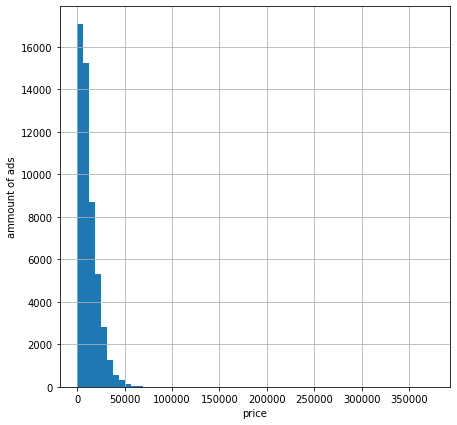

In [46]:
# Lets begin plotting with the prices
data_upd['price'].hist(bins=60, figsize=(7, 7))
plt.xlabel('price')
plt.ylabel('number of ads')
plt.show()

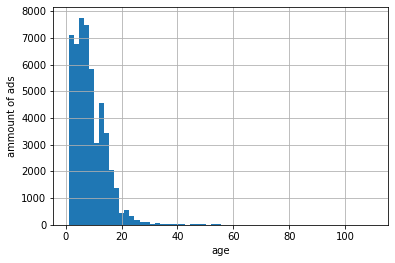

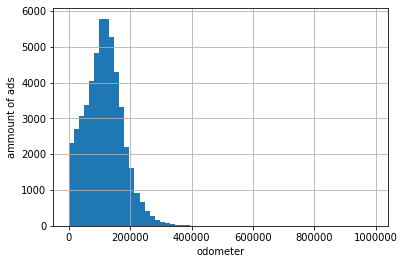

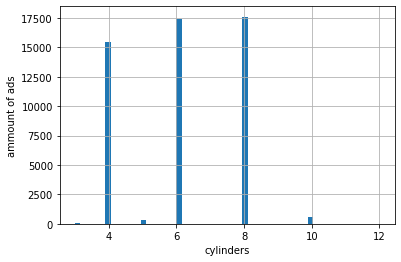

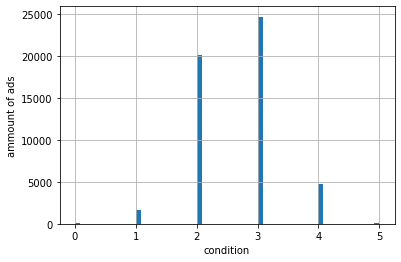

In [47]:
# Automating this process for other parameters as well
for parameter in ['age', 'odometer', 'cylinders', 'condition']:
        data_upd[parameter].hist(bins=60)
        plt.xlabel(parameter)
        plt.ylabel('number of ads')
        plt.show()
        print()
        print()
    

## Intermediate conclusions

Having looked at our graphs we can see that the `age`, `odometer` and `price` have similar distribution with a very high peak as the median, especially for the price. As for `cylinders` we can conclude that the most common amounts of cylinders in cars are **4**, **6** and **8**. The most common condition status in our dataset is **3 - excellent**, but we need to keep in mind that the info in condition column is not too reliable. 

## Study and treat outliers

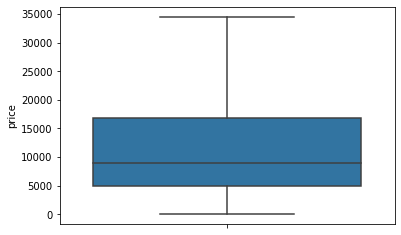

In [48]:
ax = sns.boxplot(x=data_upd['price'], showfliers = False,orient='v')


Starting with the price boxplot - it gives us a view of the interquartile range, it lies between 0 to ~35000 values, but we want to study more about this distriution. Lets write a function to make our work here easier

In [49]:
def percentile_func(parameter):
    print('The histogram of: {}'.format(parameter))
    plt.xlabel(parameter)
    plt.ylabel("ammount of ads")
    data_upd[parameter].hist(bins=60)
    plt.show()
    if data_upd[parameter].mean() > data_upd[parameter].median():
        print('The distribution is positive and is skewed to the right')
    else:
        print('The distribution is negative and is skewed to the left')
    print('---------------------------------------')
    print('Statistics on: {}'.format(parameter))
    print(data_upd[parameter].describe())
    upper_limit = np.percentile(data_upd[parameter], 99)
    lower_limit = np.percentile(data_upd[parameter], 1)
    print('---------------------------------------')
    print('The upper limit of outliers outlier is:', upper_limit)
    print('The lower limit of outliers is', lower_limit)
    print('---------------------------------------')
    print('The outliers are considered to be values below', lower_limit, 'and above', upper_limit)
    print('We have', len(data_upd[(data_upd[parameter] < lower_limit)|(data_upd[parameter] > upper_limit)]),\
          "values that we can consider outliers")
    print('The share of all located outliers is: {:.2%}'.format(len(data_upd[(data_upd[parameter] < lower_limit)
                                                                             |(data_upd[parameter] > upper_limit)]) 
                                                                                / len(data)))

This function, applied to one of the parameters will return us all the information needed: a histogram, basic statistics on the column, upper and lower limits for outliers and the ammount of outlied observations

The histogram of: price


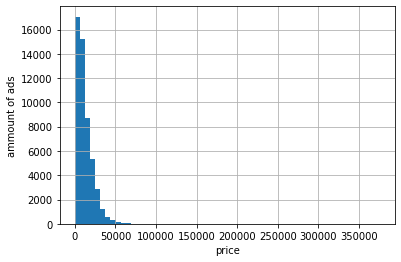

The distribution is positive and is skewed to the right
---------------------------------------
Statistics on: price
count     51442.00000
mean      12116.03919
std       10021.53735
min           1.00000
25%        5000.00000
50%        9000.00000
75%       16800.00000
max      375000.00000
Name: price, dtype: float64
---------------------------------------
The upper limit of outliers outlier is: 43995.0
The lower limit of outliers is 1.0
---------------------------------------
The outliers are considered to be values below 1.0 and above 43995.0
We have 514 values that we can consider outliers
The share of all located outliers is: 1.00%


In [50]:
# Lets start applying with price
percentile_func('price')

The histogram of: price


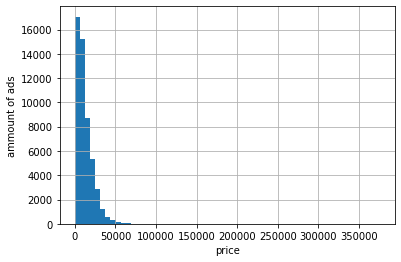

The distribution is positive and is skewed to the right
---------------------------------------
Statistics on: price
count     51442.00000
mean      12116.03919
std       10021.53735
min           1.00000
25%        5000.00000
50%        9000.00000
75%       16800.00000
max      375000.00000
Name: price, dtype: float64
---------------------------------------
The upper limit of outliers outlier is: 43995.0
The lower limit of outliers is 1.0
---------------------------------------
The outliers are considered to be values below 1.0 and above 43995.0
We have 514 values that we can consider outliers
The share of all located outliers is: 1.00%


The histogram of: age


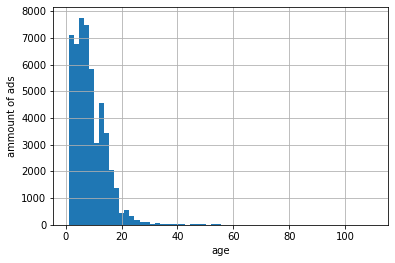

The distribution is positive and is skewed to the right
---------------------------------------
Statistics on: age
count    51442.000000
mean         8.540872
std          6.004095
min          0.990000
25%          4.000000
50%          8.000000
75%         12.000000
max        110.000000
Name: age, dtype: float64
---------------------------------------
The upper limit of outliers outlier is: 27.0
The lower limit of outliers is 0.99
---------------------------------------
The outliers are considered to be values below 0.99 and above 27.0
We have 494 values that we can consider outliers
The share of all located outliers is: 0.96%


The histogram of: odometer


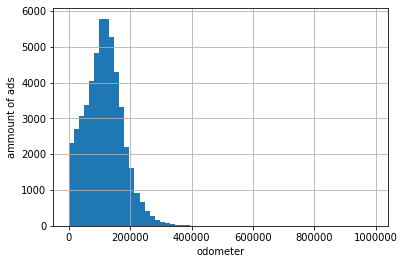

The distribution is positive and is skewed to the right
---------------------------------------
Statistics on: odometer
count     51442.000000
mean     115362.077485
std       62630.736563
min           0.000000
25%       72023.000000
50%      114250.000000
75%      153000.000000
max      990000.000000
Name: odometer, dtype: float64
---------------------------------------
The upper limit of outliers outlier is: 280000.0
The lower limit of outliers is 136.40999999999997
---------------------------------------
The outliers are considered to be values below 136.40999999999997 and above 280000.0
We have 1029 values that we can consider outliers
The share of all located outliers is: 2.00%


The histogram of: cylinders


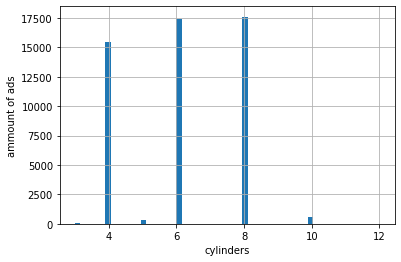

The distribution is positive and is skewed to the right
---------------------------------------
Statistics on: cylinders
count    51442.000000
mean         6.119669
std          1.657729
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64
---------------------------------------
The upper limit of outliers outlier is: 10.0
The lower limit of outliers is 4.0
---------------------------------------
The outliers are considered to be values below 4.0 and above 10.0
We have 36 values that we can consider outliers
The share of all located outliers is: 0.07%


The histogram of: condition


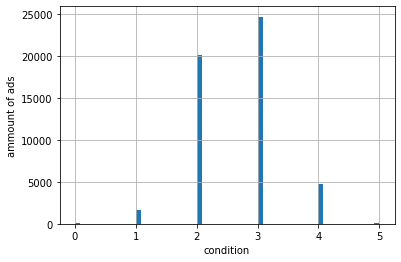

The distribution is negative and is skewed to the left
---------------------------------------
Statistics on: condition
count    51442.000000
mean         2.637592
std          0.712422
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: condition, dtype: float64
---------------------------------------
The upper limit of outliers outlier is: 4.0
The lower limit of outliers is 1.0
---------------------------------------
The outliers are considered to be values below 1.0 and above 4.0
We have 257 values that we can consider outliers
The share of all located outliers is: 0.50%




In [51]:
# We can automate the process a bit more and iterate through the rest of our parameters
for parameter in ['price','age','odometer','cylinders', 'condition']:
    percentile_func(parameter)
    print()
    print()

In [52]:
# Determine the upper and lower limits for outliers
borders = []
for parameter in ['price','age','odometer','cylinders', 'condition']:
    upper_limit = np.percentile(data_upd[parameter], 99)
    lower_limit = np.percentile(data_upd[parameter], 1)
    borders.append([parameter, lower_limit, upper_limit])

In [53]:
borders

[['price', 1.0, 43995.0],
 ['age', 0.99, 27.0],
 ['odometer', 136.40999999999997, 280000.0],
 ['cylinders', 4.0, 10.0],
 ['condition', 1.0, 4.0]]

In [54]:
# Store data without outliers in a separate DataFrame
borders_data = pd.DataFrame(borders, columns=['parameter', 'lower_limit', 'upper_limit'])
borders_data

,parameter,lower_limit,upper_limit
0,price,1.00,43995.0
1,age,0.99,27.0
2,odometer,136.41,280000.0
3,cylinders,4.00,10.0
4,condition,1.00,4.0


*Lets break down those results:* 

1 - Our function returned us a lower limit for the **price** equals **1**, but logic tells us that everything under **500** should be concidered as the sellers mistakes or an attempt to show that they're willing to neggotiate over the price. We will round the upper limit of the price for our convinience.

2 - As for the **age** of the vehicle there should be no lower limit, the car can be aged less than a year and it is not an outlier, but the upper limit is fine and we will round it a bit too.

3 - Regarding the **odometer** that returned a lower limt equals **136.41**. Lets remember, that our youngest car is less than one year old, and it is seems normal that its' odometer measures would be very low, so we won't touch the lower limit, but we will use the upper one, again, rounding it just a little.

4 - For cylinders and condition those are not really outliers, because those parameters are more of a categorical nature, and we will not ommit them at all. 

## Study core parameters without outliers

In [55]:
# Translating our conclusions into python langauge
outlier_filter = (data_upd['price'] >= 500) & (data_upd['price'] <= 44000) 
                                            & (data_upd['age'] <= 30) 
                                            & (data_upd['odometer'] <= 300000)

In [56]:
good_data = data_upd[outlier_filter]
good_data.describe()

,price,model_year,condition,cylinders,odometer,days_listed,weekday,month,year,age,avg_milage
count,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000
mean,11966.806660,2009.900976,2.628640,6.070615,116221.833465,39.562570,3.001502,6.630385,2018.306893,8.437698,17766.465690
std,8609.707517,5.308928,0.707777,1.634229,58053.884965,28.226469,1.995764,3.472388,0.461209,5.274938,12068.069687
min,500.000000,1988.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,2018.000000,0.990000,0.000000
25%,5400.000000,2007.000000,2.000000,4.000000,75052.000000,19.000000,1.000000,3.000000,2018.000000,4.000000,10958.545455
50%,9491.000000,2011.000000,3.000000,6.000000,116000.000000,33.000000,3.000000,7.000000,2018.000000,8.000000,15140.000000
75%,16595.000000,2014.000000,3.000000,8.000000,153634.000000,53.000000,5.000000,10.000000,2019.000000,12.000000,21185.000000
max,44000.000000,2019.000000,5.000000,12.000000,300000.000000,271.000000,6.000000,12.000000,2019.000000,30.000000,197676.767677


In [57]:
(data_upd.shape[0] - good_data.shape[0]) / data_upd.shape[0]

0.04200847556471366

We have removed our outliers according to the conclusions made and restored them in a new data frame which will be working with from this point. After the manipulations the previous version of our data has lost **0.4%** of observations. 
Having looked at the description of our data without outliers we can notice, that the data started making a bit more sense. For example: our oldest vehicle is now **30** years old, the average mileage is about **12000**, and if we multiply those numbers we will get a result ~360000, and its' pretty close to the maximum value we see at the odometer measures.

## Ads lifetime

For our next step we need to analyze the number of ads and the average price for each type of vehicle. Let's plot a graph showing the dependence of the number of ads on the vehicle type and then select the two types with the greatest number of ads. We will take the function we used previously and adjust it to our needs:

In [58]:
def lifetime_func(parameter):
    print('The mean of: {}'.format(parameter))
    print(good_data[parameter].mean())
    print('The median of: {}'.format(parameter))
    print(good_data[parameter].median())
    print('The histogram of: {}'.format(parameter))
    plt.xlabel(parameter)
    plt.ylabel('ammount of ads')
    good_data[parameter].hist(bins=60)
    plt.show()
    if good_data[parameter].mean() > good_data[parameter].median():
        print('The distribution is positive and is skewed to the right')
    else:
        print('The distribution is negative and is skewed to the left')
    print('---------------------------------------')
    print('Statistics on: {}'.format(parameter))
    print(good_data[parameter].describe())
    upper_limit = np.percentile(good_data[parameter], 99)
    lower_limit = np.percentile(good_data[parameter], 1)
    print('---------------------------------------')
    print('The upper limit of outliers outlier is:', upper_limit)
    print('The lower limit of outliers is', lower_limit)
    print('---------------------------------------')
    print('The outliers are considered to be values below', lower_limit, 'and above', upper_limit)
    print('We have', len(good_data[(good_data[parameter] < lower_limit)|(good_data[parameter] > upper_limit)]),\
          "values that we can consider outliers")
    print('The share of all located outliers is: {:.2%}'.\
          format(len(good_data[(good_data[parameter] < lower_limit)
                               |(good_data[parameter] > upper_limit)]) 
                                 / len(good_data)))

The mean of: days_listed
39.56256975304884
The median of: days_listed
33.0
The histogram of: days_listed


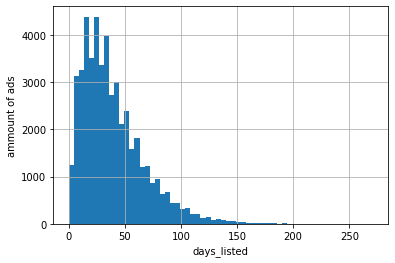

The distribution is positive and is skewed to the right
---------------------------------------
Statistics on: days_listed
count    49281.000000
mean        39.562570
std         28.226469
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64
---------------------------------------
The upper limit of outliers outlier is: 132.0
The lower limit of outliers is 3.0
---------------------------------------
The outliers are considered to be values below 3.0 and above 132.0
We have 940 values that we can consider outliers
The share of all located outliers is: 1.91%


In [59]:
lifetime_func('days_listed')

On average the amount of days the advertisments were listed is **39**, and we know that the the distribution is positive, which means that the median will be smaller and it is equals to **33** days. We stated before that the minimum value here probably occured because the ad was placed on the day the dataset was created, however the maximum value is certeinly an outlier, as our function shows in general, every observation above **132** days listed is an outlier. It would be correct to state, that for this dataset a typical ammount of days that the ad was listed lies **between 3 and 132, with an average between 33 and 39 days.**  

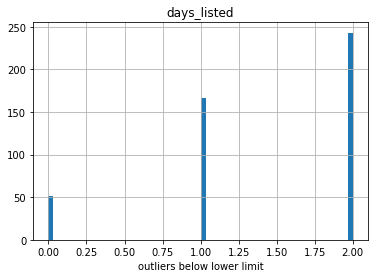

In [60]:
# Have a closer look at the outliers
good_data.query('days_listed < 3').hist('days_listed', bins=60)
plt.xlabel("outliers below lower limit")
plt.show()

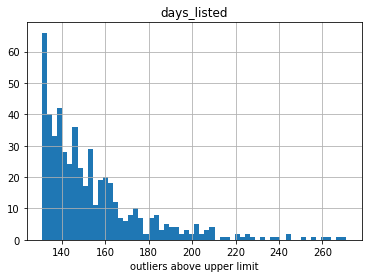

In [61]:
good_data.query('days_listed > 130').hist('days_listed', bins=60)
plt.xlabel("outliers above upper limit")
plt.show()

Above the upper border of the outliers we can see a decrease untill ~ 200 days and then the frequancy sort of aligns. 

Whats happening below the lower border: we see **50** new ads, **150** cars sold for the next days and **250** more were sold after being advertised just for two days. Either those cars were very popular, or the seller changed their mind and deleted the ad.

## Average price per each type of vehicle

Lets analyze the number of ads and the average price for each type of vehicle. We need to plot a scatterplot that will show the dependence of the number of ads on the vehicle type. Then, we need to select the two types with the greatest number of ads. We will do that by grouping our data and storing it in a new dataset for further analisys and creating a scatterplot and a barchart for better visualization of the results.

In [62]:
# Creating a subset for all the types of vehicles, their ammount of ads and average price
types_data = good_data.groupby('type')['price'].agg(['count', 'mean']).reset_index()
types_data

,type,count,mean
0,SUV,11950,11131.680335
1,bus,24,17135.666667
2,convertible,386,12721.847150
3,coupe,2027,14261.505180
4,hatchback,1006,6972.739563
5,mini-van,1152,8057.579861
6,offroad,204,13939.833333
7,other,249,10803.076305
8,pickup,6772,15733.299616
9,sedan,11817,7116.886519


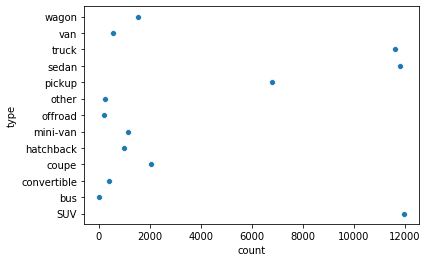

In [63]:
ax = sns.scatterplot(data=types_data, x='count', y='type')

We can see that the most advertysed types of vehicles start from **6000** ads per type and higher, with maximum number af ads equals to ~ 12000, and they are: `pickup`, `truck`, `sedan` and `SUV`, now lets sort our grouped data in order to get the two most popular vehicle types.

In [64]:
top_types = good_data.groupby(['type'])['price'].nunique().reset_index().sort_values(by='price', ascending=False)
top_types

,type,price
0,SUV,1531
10,truck,1489
9,sedan,1143
8,pickup,952
3,coupe,488
5,mini-van,391
12,wagon,374
4,hatchback,330
11,van,224
2,convertible,199


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

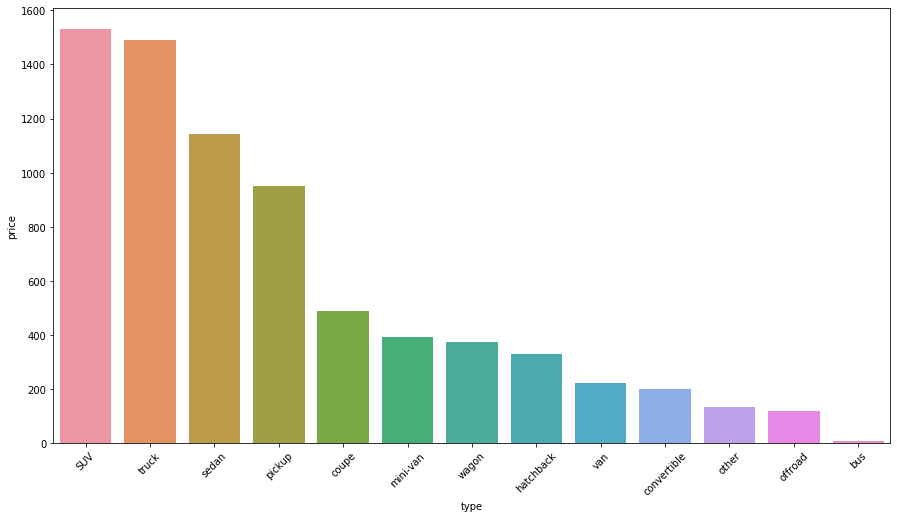

In [65]:
plt.figure(figsize = (15,8))
sns.barplot(x='type', y='price', data=top_types)
plt.xticks(rotation=45)
plt.show()

In [66]:
top_list = list(top_types.head(2)['type'])
top_list

['SUV', 'truck']

So after analyzing our sorted list, scattreplot and barplot we can define that the most popular types of a vehicle in our dataste are SUVs and trucks

## Price factors

The factors to be studied are:
    
    - age
    - mileage
    - condition
    - transmission type
    - color
    
Filtering our dataset by the top types of vehicles sold, we need to create a scatterplot matrix for the age, milage and condition to show us the dependency of price upon those factors. After making sure, that each category in the transmission type and color has no less than **50** observations we will create boxplots for them to show how the price distributed among those factors.

In [67]:
final_data = good_data[good_data['type'].isin(top_list)]
final_data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,month,year,age,avg_milage
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,5,6,2018,7.0,20714.285714
7,15990,2013,honda pilot,3,6,gas,109473,automatic,SUV,black,True,2019-01-07,68,0,1,2019,6.0,18245.500000
8,11500,2012,kia sorento,3,4,gas,104174,automatic,SUV,unknown,True,2018-07-16,19,0,7,2018,6.0,17362.333333
9,9200,2008,honda pilot,3,6,gas,147191,automatic,SUV,blue,True,2019-02-15,17,4,2,2019,11.0,13381.000000
14,12990,2009,gmc yukon,3,8,gas,132285,automatic,SUV,black,True,2019-01-31,24,3,1,2019,10.0,13228.500000


In [68]:
# Lets start studiyng the factors with SUV
SUV = final_data.query('type == "SUV"')
SUV.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,month,year,age,avg_milage
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,5,6,2018,7.0,20714.285714
7,15990,2013,honda pilot,3,6,gas,109473,automatic,SUV,black,True,2019-01-07,68,0,1,2019,6.0,18245.500000
8,11500,2012,kia sorento,3,4,gas,104174,automatic,SUV,unknown,True,2018-07-16,19,0,7,2018,6.0,17362.333333
9,9200,2008,honda pilot,3,6,gas,147191,automatic,SUV,blue,True,2019-02-15,17,4,2,2019,11.0,13381.000000
14,12990,2009,gmc yukon,3,8,gas,132285,automatic,SUV,black,True,2019-01-31,24,3,1,2019,10.0,13228.500000


In [69]:
# Creating a subset for numerical variables 
for_scatter = SUV[['price', 'age', 'odometer', 'condition']]
for_scatter

,price,age,odometer,condition
0,9400,7.0,145000,2
7,15990,6.0,109473,3
8,11500,6.0,104174,3
9,9200,11.0,147191,3
14,12990,10.0,132285,3
...,...,...,...,...
51495,9500,7.0,144500,2
51496,4999,16.0,177901,3
51500,6995,6.0,157000,3
51502,7995,8.0,111088,4


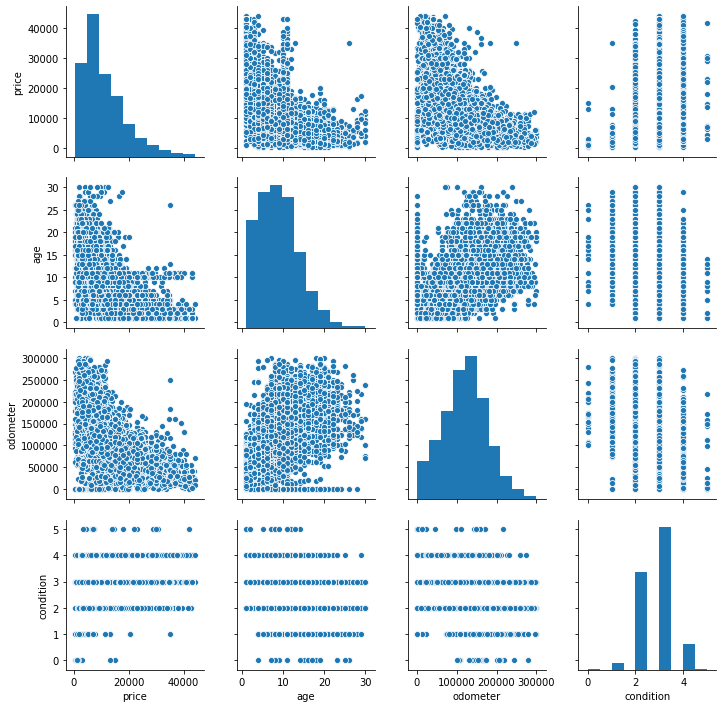

In [70]:
ax = sns.pairplot(for_scatter)

In [71]:
for_scatter.corr()

,price,age,odometer,condition
price,1.000000,-0.629348,-0.614597,0.305554
age,-0.629348,1.000000,0.607230,-0.310690
odometer,-0.614597,0.607230,1.000000,-0.324029
condition,0.305554,-0.310690,-0.324029,1.000000


From the scatterplot matrix we can conclude the next:

1. The lower the age of the suv, the higher its' price
2. The lower the measures of the odometer, the higher the price
3. **"0"** condition (former salvage) - has mostly low prices; **"1"** (fair) - has a bit higher prices but still low; **"2", "3" and "4"** (known as good, excellent and as new) - the prices equally distributed between the lowest and highest prices; **"5"** (was new before the change) - its' minimum price starts higher than with the other conditions and the prices spreaded in the middle part of the plot, but lets not forget that not all vehicles stated as new were actually new. Also we can say that conditions **"0"**, **"1"** and **"5"** were sold less times than **"2"**, **"3"** and **"4"**.

The `corr()` method can advocate for what we saw on the scatterplot matrix: there is a **middle level negative** correlation in age and price (-0.62), and odometer and price (-0.63). Have a look at the correlation rate at age and odometer: the higher the age, the higher the odometer. Makes sense.

In [72]:
SUV['transmission'].value_counts() # making sure we have more than 50 observations

automatic    11365
manual         492
other           93
Name: transmission, dtype: int64

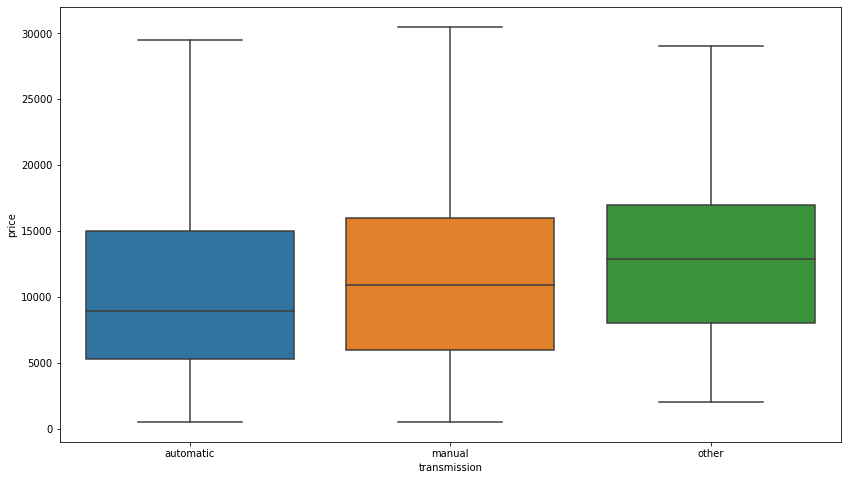

In [73]:
plt.figure(figsize=(14, 8))
ax = sns.boxplot(x='transmission', y='price', data=SUV, showfliers=False)

Since we don't know much about what does the `other` transmission type stands for, we can only assume by looking at its' highest price median that those are either very specific and old stock types of transmissions, or the other way around - very modern and technologically reliable types of transmission. The second place goes to the manual type of transmission and it is traditionally higher in price than automatic as it is more loved amongst suv drivers (manual type of transmission gives you more control on difficult road condition, which is the suvs' purpose).

In [74]:
SUV['paint_color'].value_counts() # making sure we have more than 50 observations

unknown    2146
black      2099
white      1899
silver     1514
grey       1154
blue       1015
red         883
green       427
brown       362
custom      280
orange       84
yellow       48
purple       39
Name: paint_color, dtype: int64

In [75]:
# getting rid of the parameters with low ads quantity
suv = SUV.query('paint_color != "yellow" and paint_color != "purple"') 

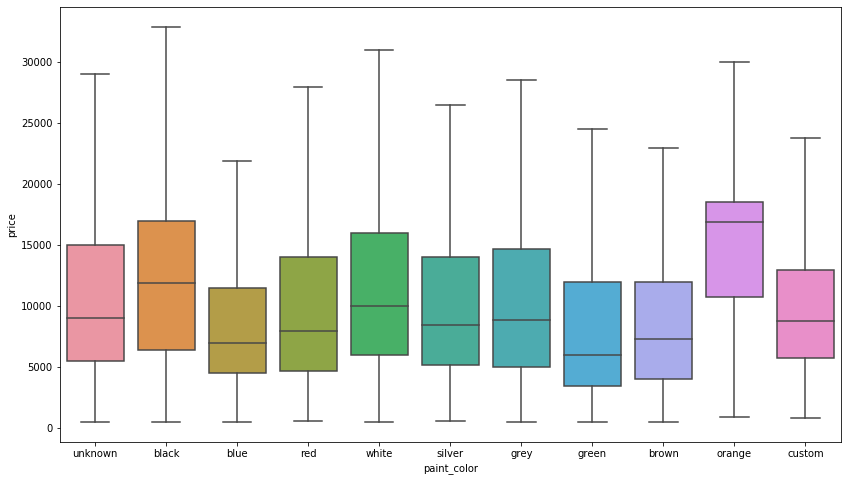

In [76]:
plt.figure(figsize = (14, 8))
ax = sns.boxplot(x = 'paint_color', y = 'price', data = suv, showfliers = False)

More or less, all of the colors located in the middle of our graph (blue, red, silver, gray and brown) have similar distributions. The **highest** median here belongs to **orange color** and their prices fall in quite a large range between **0 and 30000**. 

The **black and white** distributions are very lookalike - they have similar price ranges, but note that the median for black suvs is a bit bigger than it is of the white ones. 

Also, we have **custom and unknown** colors, but unfortunately - we know nothing about them.

In [77]:
# Lets run the same analysis for trucks
truck = final_data.query('type == "truck"')
truck.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,month,year,age,avg_milage
22,7500,2004,chevrolet silverado,4,8,gas,180000,automatic,truck,red,True,2019-01-05,64,5,1,2019,15.0,12000.000000
39,8000,2009,ford f-150,2,8,gas,234000,automatic,truck,black,True,2019-03-31,1,6,3,2019,10.0,23400.000000
50,6200,2006,ford f-150,3,6,gas,69698,automatic,truck,custom,False,2018-05-03,50,3,5,2018,12.0,5808.166667
53,10400,2012,chevrolet colorado,3,5,gas,111871,automatic,truck,red,True,2019-01-30,27,2,1,2019,7.0,15981.571429
60,13000,2005,ram 1500,2,8,gas,146000,automatic,truck,grey,True,2019-03-14,26,3,3,2019,14.0,10428.571429


In [78]:
for_scatter2 = truck[['price', 'age', 'odometer', 'condition']]

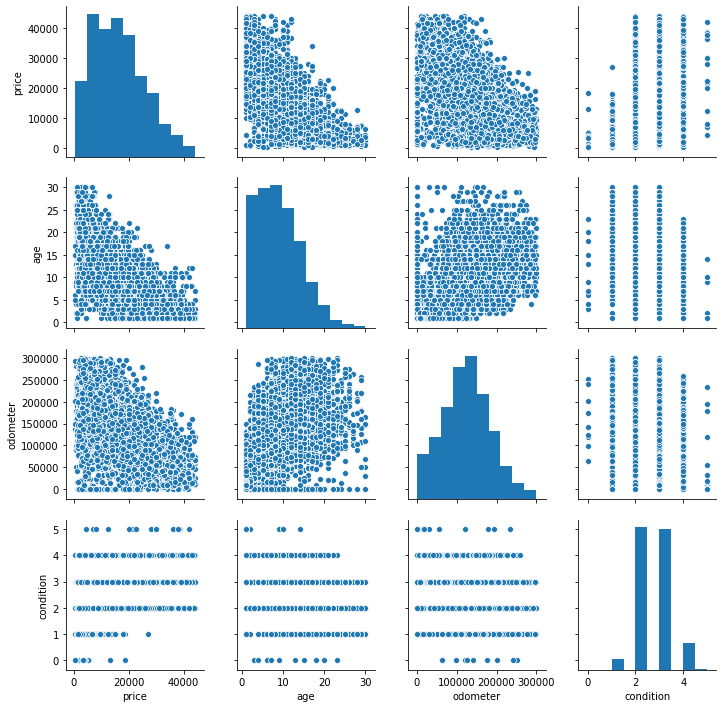

In [79]:
ax = sns.pairplot(for_scatter2)

In [80]:
for_scatter2.corr()

,price,age,odometer,condition
price,1.000000,-0.702160,-0.572282,0.363382
age,-0.702160,1.000000,0.532771,-0.321336
odometer,-0.572282,0.532771,1.000000,-0.296962
condition,0.363382,-0.321336,-0.296962,1.000000


Looks like the dependencies on our scatterplot matrix for trucks doesn't differ that much of the suvs's, however we can point out that the **prices for trucks are higher than those for suvs** and are distributed in a more even way. Most of the patterns here are the same, i.e., age and odometer negativly correlate with the price, there is a slight defference in numbers though, and the positive correlation between age and odometer is also persent. 

In [81]:
truck['transmission'].value_counts() # checking that we have more than 50 ads for the transmission types

automatic    11105
manual         421
other           87
Name: transmission, dtype: int64

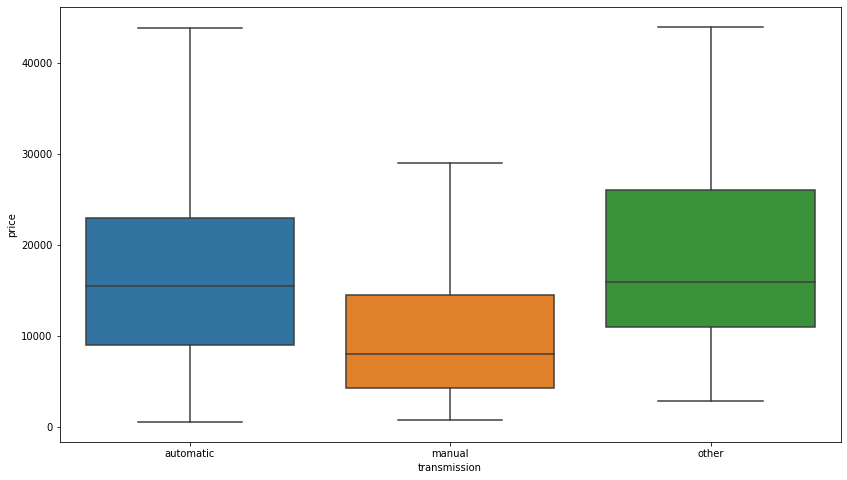

In [82]:
plt.figure(figsize = (14, 8))
ax = sns.boxplot(x = 'transmission', y = 'price', data = truck, showfliers = False)

This looks interesting: let us draw our attention to the fact that unlike with suvs - manual type of transmissions are much cheaper than automatic ones with trucks, judging by their medians. Again - we don't really know what kinds of types hide inside the "other" category so we can only assume that those are either some specific stock types or very modern and technological.

In [83]:
truck['paint_color'].value_counts() # checking every color had 50 ads

white      3497
unknown    2014
black      1459
red        1017
silver      965
grey        901
blue        841
custom      293
green       265
brown       232
yellow       66
orange       48
purple       15
Name: paint_color, dtype: int64

We can see **orange and purple** had less than **50** ads, but looks like **yellow** with 66 ads is still an underdog, because the gap between it and the next closest color is quite big, so we will ommite it too.

In [84]:
trucks = truck.query('paint_color != "orange" and paint_color != "purple" and paint_color != "yellow"')

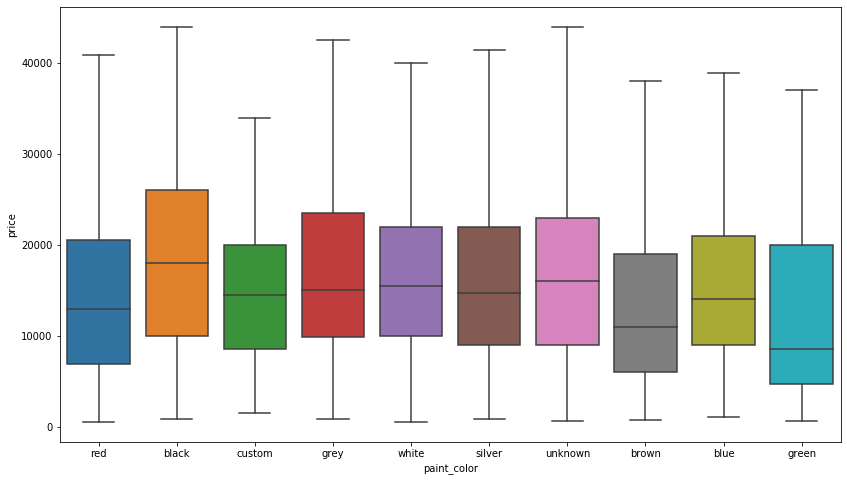

In [85]:
plt.figure(figsize = (14, 8))
ax = sns.boxplot(x = 'paint_color', y = 'price', data = trucks, showfliers = False)

According to the medians at the boxplot graph **black truck are the most expensive** ones and distributed more than any other color in price and **cheapest one here is green**, just like with the suvs, the rest of the colors are more or less similar to each other. 

 ## General conclusion

**1. The data preparation stage:**

In our original dataset we had **51525 observations with 13 columns** and missing values in `model_year`, `cylinders`, `odometer`, `paint_color` and `is_4wd` columns, we treated all of them, except a very small share (less than 1%) of the `odometer` which was dropped. There were unsuitable data types in the `model_year`, `odometer`, `cylinders`, `date_posted` and `is_4wd` columns which we fixed. We added **5** new columns, such as: `day of the week` the ad was posted, its' `month`, its' `year`, the `age` of the vehicle and its' `average mileage`. We checked our data for zeros and all of them seemed valid according to the column they were located in, except from age of the car, which we fixed to "less than one year" = 0.99 to make the further calculations with it possible. We also replaced the conditions names for numbers. At this point we noticed that not all of the information at this column looks correct (a car, defined as new would sometimes be a model of 2008 or 2011).

**2. The exploratory data analysis stage:**

Using a function we plotted histograms for our clean data and the core parameters, such as: `price`, `age`, `odometer`, `cylinders` and `condition`. Having looked at our graphs we saw that the age, odometer and price had similar distribution with a very high peak at the median, especially for the price. As for cylinders we concluded that the most common ammounts of cylinders in vehicles are 4, 6 and 8. The most common condition status in our dataset was 3 - excellent, but we need to keep in mind that the info in condition column is not too reliable. We then, using a function again, **determined outliers**, adjusted them, relying on common sence and removed them. 

After studiying our data without outliers, using the `describe()` method we noticed, that the data started making a bit more sense. For example: our oldest vehicle became 30 years old instead of 114 as it was before removing outliers, the average milage was about 12000, and if we were to multiply those numbers we would get a result ~360000, which became pretty close to the maximum value we saw at the odometer measures. 

Having our data without outliers we could determine ads' lifetime: as was stated for this dataset a typical range of ammount of days that the ad was listed lies between **3 and 132** days, with an average  ammount of days listed between **33 and 39** days. The minimum value was 0 days and we made the assumption that it is because the ad was probably placed on the day the dataset was uploaded. The maximum ammount of days is 271.

With the help of a scatterplot and a barchart we found out which types of vehicles were bestsellers - they turned out to be pickups with a big gap from all of the rest and a count of ~ 6000 ads, and again with a twice as big of a gap from pickups our two top types were **SUVs and trucks with ~ 12000 ads placed**. 

**3. The general conclusion:**

In conclusion we created two subsets for SUVs and trucks and studied the dependencises of `price with age`, `milage and condition` by creating a scatterplot matrix and the `corr()` method, and the dependencises of `price with transmission type` and `color` using box-and-whiskers plots for each subset, and this is what we found:

- In average the prices of the trucks are higher than SUVs, but SUVs had more advertisments, than trucks.
- In both of vehicle types there was a middle level negative correlation in age and price, odometer and price, and of course a positive correlation between age and odometer. 
- In both of the vehicle types the "0" condition (former salvage) - had mostly low prices; "1" (fair) - had a bit higher prices but still low; "2", "3" and "4" (known as good, excellent and as new) - prices equally distributed between the lowest and highest prices; "5" (was new before the change) - its' minimum price starts higher than with the other conditions and the prices spreaded in the middle part of the plot, but lets not forget that not all vehicles stated as new were actually new. Also we can say that conditions "0", "1" and "5" were sold less times than "2", "3" and "4". 
- In SUVs the cheapest transmission type was automatic with the median ~ 8000, then came manual ~ 10000 and above, then came a misterious category defined as "other" which we assumed was either a very rare stock type or a very modern and technologicall one with the highest median price ~ 13000. In trucks, however the same visualisation showed us a different picture: manual type (median ~ 7000) of transmissions turned out to be cheaper than automatic ones (median ~ 15000). Again - we don't really know what kinds of types hide inside the "other" category so we can only make assumptions, but it is again the most expensive category, the median is ~ 15000 and prices distibution in a higher range than the others.
- As for the colors, we had "unknown" and "custom" colors in both suvs and trucks which we knew nothing about. We had colors with an ammount of ads so small, that we dropped them: yellow and purple in SUVs and yellow, purple and orange in trucks - those are rare colors for vehicles. More or less all of the colors did distibute in a very similar way to each other, however in SUVs the orange color was the most expensive - it could mean that this color is popular. The black and white had the biggest interqurtile range of the prices, and black suvs were the little bit more expensive ones. On the other hand, in trucks the black ones were seemingly more expensive than the white ones. In both of the vehicle types the green color was found to be the cheapest one.
